# **Insper - Eletromagnetismo e Ondulatória** #


**Projeto**



In [11]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Use essa célula para implementar os itens a) a b)
Cs = [150*1e-9, 0.1*1e-6, 0.47*1e-6, 1e-6, 4.7*1e-6]
Cs_labels = ['150nF', '0.1uF', '0.47uF', '1uF', '4.7uF']
fs = np.arange(1, 100*1e3, 10)
Rc = 5
k = 0.2
V1 = 10

c) Observe a função que criamos na célula abaixo. Tente explicar o que ela faz.

In [13]:
def CalcularTransformadorSerie(Uf, c, f):
    C1 = c
    C2 = c
    w = 2*np.pi*f
    L1 = 1/(w**2*C1)
    L2 = 1/(w**2*C2)
    R1 = 2
    R2 = 2
    R1 = R1 + (R1*f)/(1e5)
    R2 = R2 + (R2*f)/(1e5)

    M = k * sqrt(L1 * L2)
    XL1 = complex(0, w * L1)
    XL2 = complex(0, w * L2)
    XC1 = complex(0, -1/(w * C1))
    XC2 = complex(0, -1/(w * C2))
    XM = complex(0, w * M)
    
    Z=np.array([[R1 + XL1 + XC1, -XM], [-XM, XL2 + R2 + XC2 + Rc]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

def CalcularTransformadorParalelo(Uf, c, f):
    C1 = c
    C2 = c
    w = 2*np.pi*f
    L1 = 1/(w**2*C1)
    L2 = 1/(w**2*C2)
    R1 = 2
    R2 = 2
    R1 = R1 + (R1*f)/(1e5)
    R2 = R2 + (R2*f)/(1e5)

    M = k * sqrt(L1 * L2)
    XL1 = complex(0, w * L1)
    XL2 = complex(0, w * L2)
    XC1 = complex(0, -1/(w * C1))
    XC2 = complex(0, -1/(w * C2))
    XM = complex(0, w * M)
    
    Zeq_C2_RC = (Rc*XC2)/(Rc+XC2)
    Z=np.array([[R1 + XL1 + XC1, -XM], [-XM, XL2 + Zeq_C2_RC + Rc]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1], Zeq_C2_RC

In [14]:
resultados_serie = {}
resultados_paralelo = {}
for c in Cs:
    V2s_serie = []
    ns_serie = []
    V2s_paralelo = []
    ns_paralelo = []
    for f in fs:
        i1, i2 = CalcularTransformadorSerie(V1, c, f)
        V2 = i2*Rc
        s1 = V1*i1.conjugate()/2
        s2 = V2*i2.conjugate()/2
        n = s2/s1
        V2s_serie.append(abs(V2))
        ns_serie.append(n*100)
        resultados_serie[c] = {"V2": V2s_serie, "n": ns_serie}
        
        i1, i2, Zeq_C2_RC = CalcularTransformadorParalelo(V1, c, f)
        V2 = i2*Zeq_C2_RC
        s1 = V1*i1.conjugate()/2
        s2 = (V2**2)/(np.sqrt(2)*Rc)
        n = s2/s1
        V2s_paralelo.append(abs(V2))
        ns_paralelo.append(n*100)
        resultados_paralelo[c] = {"V2": V2s_paralelo, "n": ns_paralelo}
        

c:\Users\ribei\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


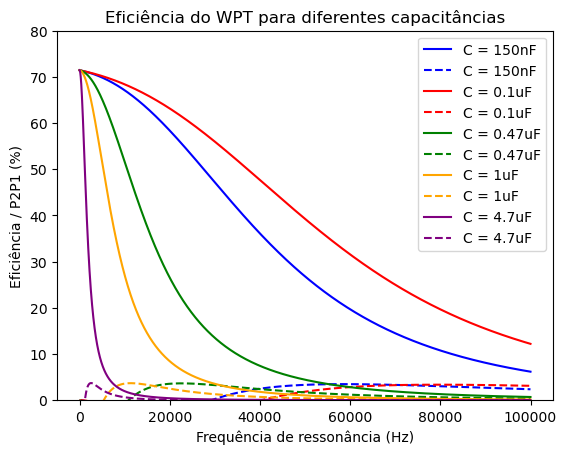

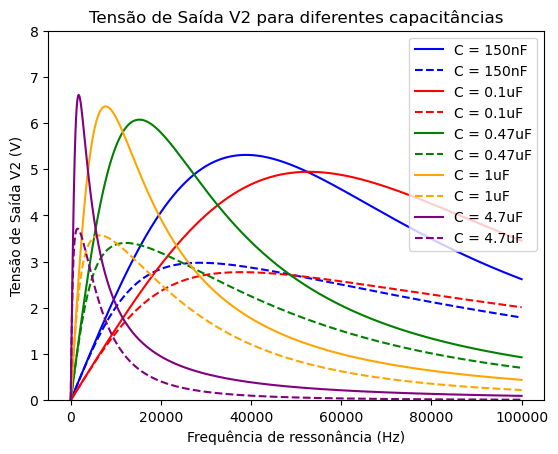

In [15]:
# Cores para as diferentes curvas
cores = ['b', 'r', 'g', 'orange', 'purple']

# Plotando a eficiência (no eixo da esquerda)
for i, c in enumerate(Cs):
    plt.plot(fs, resultados_serie[c]['n'], color=cores[i], label=f'C = {Cs_labels[i]}', linestyle='-')
    plt.plot(fs, resultados_paralelo[c]['n'], color=cores[i], label=f'C = {Cs_labels[i]}', linestyle='--')
plt.legend()
plt.xlabel('Frequência de ressonância (Hz)')
plt.ylabel('Eficiência / P2P1 (%)')
plt.ylim(0, 80)
plt.title('Eficiência do WPT para diferentes capacitâncias')

plt.show()

# Criando o segundo eixo y para a tensão de saída
for i, c in enumerate(Cs):
    plt.plot(fs, resultados_serie[c]['V2'], color=cores[i], label=f'C = {Cs_labels[i]}', linestyle='-')
    plt.plot(fs, resultados_paralelo[c]['V2'], color=cores[i], label=f'C = {Cs_labels[i]}', linestyle='--')
plt.legend()
plt.xlabel('Frequência de ressonância (Hz)')
plt.ylabel('Tensão de Saída V2 (V)')
plt.ylim(0, 8)
plt.title('Tensão de Saída V2 para diferentes capacitâncias')
plt.show()